## Decision Tree (Supervised Learning) Iris Code

Goal: Predict a category or class.

Output: Discrete values (e.g., "Setosa", "Versicolor", "Virginica" or "Spam", "Not Spam").

The Question: "Which group does this belong to?"

Metric: Accuracy (%).

In [6]:
#importing
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Load Iris Dataset from Sklearn Library
dataset = datasets.load_iris()

#Convert to pandas DataFrame for easier manipulation
#We keep the column names (feature_names) which helps tracking data later
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target  # Add flower class column

#Split features (X) and target/labels (y)
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df['target']     # Last column (classes)

#Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

#Apply cross-validation for a better performance assessment
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Average cross-validation accuracy: {cross_val_scores.mean():.2f}')

#Test with a new sample
#This prevents the "UserWarning: X does not have valid feature names" error.
new_sample_data = [[5.1, 3.5, 1.4, 0.2]]
new_sample = pd.DataFrame(new_sample_data, columns=dataset.feature_names)

prediction = model.predict(new_sample)
print(f'Predicted class for the new sample: {dataset.target_names[prediction[0]]}')

Model accuracy: 1.00
Average cross-validation accuracy: 0.95
Predicted class for the new sample: setosa


## K-Means Clustering

Key Concept: "The Blind Fold" When you ran the Decision Tree (The Iris Code), you showed the computer the flower measurements AND the flower names (Setosa, Versicolor, etc.).

The model grouped them based on math (distance).

It doesn't know what the groups are (it calls them 0, 1, 2).

It just knows that "points in group 0 are close to each other."

Challenge: In real life, we often don't know how many groups (n_clusters) exist.

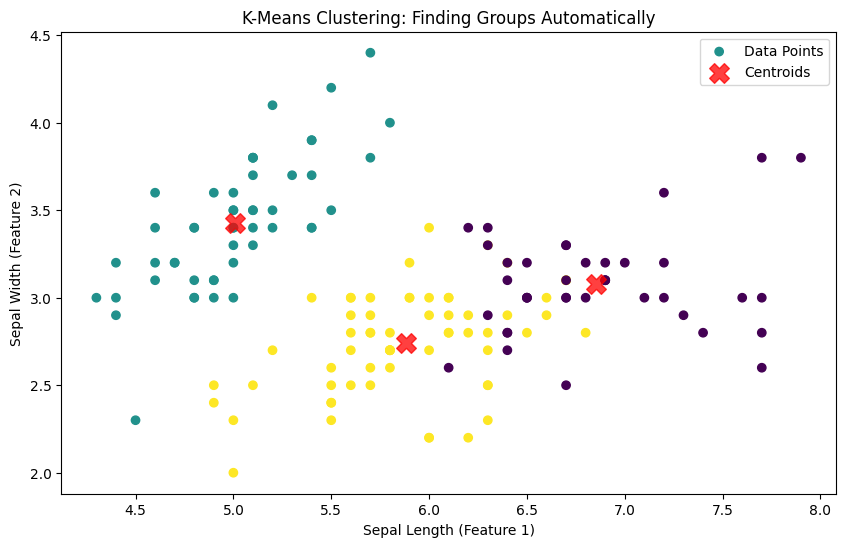

In [13]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Data Loading (No Target Variable!)

iris = load_iris()

#Notice we only load X (Features). We do not load 'y' (Targets).
#In unsupervised learning, the model doesn't know the flower names.
X = iris.data


#Model Training (Clustering)

# We initialize K-Means looking for 3 clusters (groups).
# The algorithm will try to group similar data points together.
kmeans = KMeans(n_clusters=3, random_state=42)

# We use fit_predict() to both learn the centers and assign data to groups
clusters = kmeans.fit_predict(X)

#Visualization

plt.figure(figsize=(10, 6))

#Plot the data points, colored by the cluster the model assigned them to
#X[:, 0] is Sepal Length, X[:, 1] is Sepal Width
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Data Points')

#Plot the "Centroids"
#These red 'X' marks show the mathematical center of each group
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-Means Clustering: Finding Groups Automatically")
plt.xlabel("Sepal Length (Feature 1)")
plt.ylabel("Sepal Width (Feature 2)")
plt.legend()
plt.show()

## Regression (The California Housing Code)

Goal: Predict a continuous quantity.

Output: Continuous numbers (e.g., House Price, Temperature, Stock Value).

The Question: "How much?" or "How many?"

Metric: Mean Squared Error (MSE) or R².

Mean Squared Error (MSE): 0.53
Coefficient of Determination (R²): 0.60


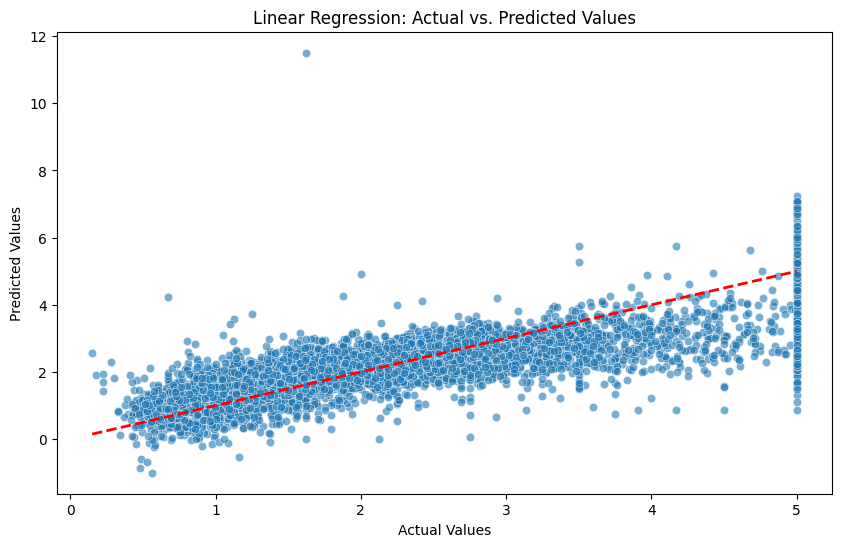

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

#Data Loading and Preparation

#Load the California Housing dataset (a standard dataset for regression practice)
california = fetch_california_housing()

#Convert the raw data into a Pandas DataFrame for easier analysis and manipulation
#'data' contains the features (inputs), and 'feature_names' are the column headers
df = pd.DataFrame(california.data, columns=california.feature_names)

#Add the target variable (what we want to predict) to the DataFrame
#In this dataset, the target is the median house value
df['PRICE'] = california.target

#Preprocessing

#Define Features (X) and Target (y)
#X: Independent variables (all columns except PRICE) used to make predictions
X = df.drop('PRICE', axis=1)
#y: Dependent variable (PRICE) that we are trying to predict
y = df['PRICE']

#Split the data into Training and Testing sets
#- Training set (70%): Used to teach the model patterns in the data
#- Testing set (30%): Used to evaluate how well the model performs on unseen data
#- random_state=42: Ensures the split is the same every time we run the code (reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Model Training

#Initialize the Linear Regression model
#This algorithm fits a straight line (or hyperplane) to minimize the error between points
model = LinearRegression()

#Train the model using the training data
#The model "learns" the relationship between X_train and y_train here
model.fit(X_train, y_train)

#Prediction and Evaluation

#Make predictions on the test set
#The model uses the rules it learned to guess the prices for X_test
y_pred = model.predict(X_test)

#Calculate performance metrics
#MSE: The average squared difference between estimated values and the actual value.
#(Lower is better; 0 means perfect prediction)
mse = mean_squared_error(y_test, y_pred)

#R² (R-squared): Represents the proportion of variance for the dependent variable
#that's explained by independent variables.
#(Closer to 1 is better; 1 means the model explains all variability)
r2 = r2_score(y_test, y_pred)

#Display metrics to the console
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Coefficient of Determination (R²): {r2:.2f}")

#Visualization

#Create a scatter plot to visually compare Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6) # alpha makes points transparent to see density

#Draw a Reference Line (Identity Line)
#This red dashed line represents perfect predictions (where Actual == Predicted)
#Points close to this line indicate accurate predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values")
plt.show()

## Hierarchical Clustering

The algorithm builds a "family tree" of data relationships.

The Goal: Discover hidden structure or groups.

Unsupervised Learning (The Explorer): Here, there was no teacher. You gave the model the measurements (X), but you deleted the answers (labels). You asked the model: "Organize this mess for me." The model looked for data points that were mathematically close to each other.

Data Normalization (StandardScaler): In the first code, this wasn't strictly necessary. In the last code, it is crucial. Clustering calculates Distance (how far point A is from point B). If one variable is huge (e.g., 1000) and another is tiny (e.g., 0.1), the huge number dominates the distance calculation. Scaling forces all variables to have equal "weight" (importance).

The Dendrogram: Instead of giving you a single answer, this algorithm gives you a "map" of relationships. It doesn't just say "these are groups." It shows you which points are "cousins," "siblings," or "distant relatives" based on their similarity.

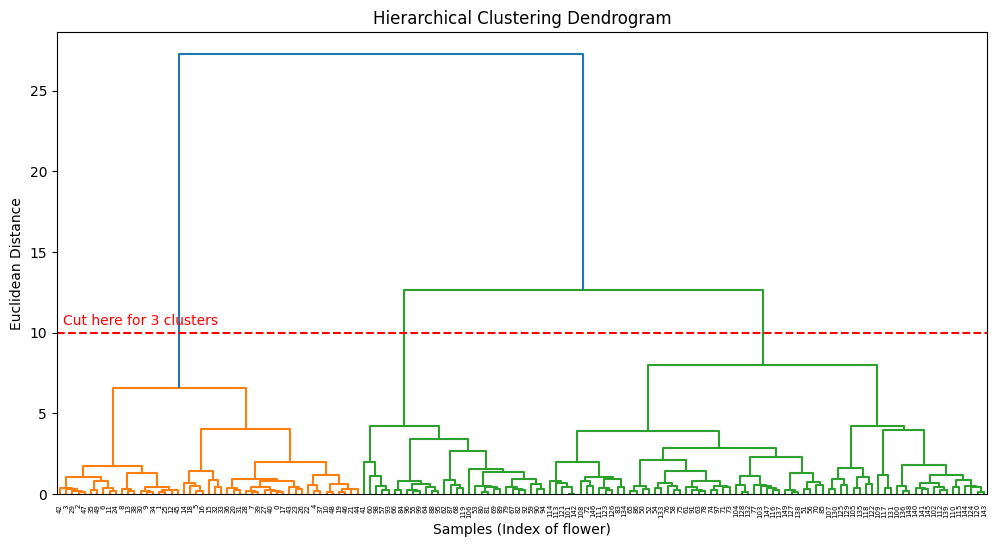

In [14]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#Data Preparation

#Load the Iris dataset
iris = load_iris()
X = iris.data

#Standardize the data (Crucial for Hierarchical Clustering!)
#Since this algorithm calculates distances (Euclidean), variables with larger
#numbers would dominate the results without scaling.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Compute Linkage Matrix

#The linkage matrix contains the history of merges (which points merged with which).
#method='ward': Minimizes the variance within clusters (similar logic to K-Means).
linkage_matrix = sch.linkage(X_scaled, method='ward')

#Plot the Dendrogram

plt.figure(figsize=(12, 6))

#The dendrogram visualizes the clustering process as a tree.
sch.dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples (Index of flower)")
plt.ylabel("Euclidean Distance")

#If we cut at distance = 10, we get 3 distinct branches (clusters).
plt.axhline(y=10, color='r', linestyle='--')
plt.text(x=10, y=10.5, s='Cut here for 3 clusters', color='red')

plt.show()